# RED White Wine Classification project

## Project Description

- The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).


- This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

## Attribute Information
Input variables (based on physicochemical tests):
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
-4 - residual sugar
-5 - chlorides
-6 - free sulfur dioxide
-7 - total sulfur dioxide
-8 - density
-9 - pH
-10 - sulphates
-11 - alcohol

**Output variable (based on sensory data):**

- 12 - quality (score between 0 and 10)


What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.


In [2]:
# iimporting important librabry
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [3]:
df=pd.read_csv("winequality-red.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
# checking the shape
df.shape

(1599, 12)

There are 1599 rows and 12 column in the dataset
- out of 12, 11 are features and 1 is label or target 


In [5]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

We can see target variable quality have 6 unique values and we need to convert it to 0 not good below 7 and 1 good above 7.

In [7]:
# makinf the copy of data frame
df1=df
df1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [8]:
# replacing all the value less than 7 to 0 which is not good
df.loc[df['quality'] < 7, 'quality'] = 0

# converting all the value above 7 as 1 which is good.
df.loc[df['quality'] >= 7, 'quality'] = 1
df.quality.unique()

array([0, 1], dtype=int64)

In the above code we have converted the problem in binary classification problem

In [9]:
df.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

As we can see the value count our dataset is imbalance we will correct it later.

### EDA

In [10]:
# checking the columns of dataset and making list 
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- from the above code can see all the datatype are float except target variable which is int
- there are 1599 rows and there is no null values.
- it consume 150 kb of system memory

In [12]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can confirm that there is no null in any column.

In [13]:
# Checking the value counts of each column
for i in df.columns:
    print("The", i,"contains:- ",df[i].nunique())
    print('\n')

The fixed acidity contains:-  96


The volatile acidity contains:-  143


The citric acid contains:-  80


The residual sugar contains:-  91


The chlorides contains:-  153


The free sulfur dioxide contains:-  60


The total sulfur dioxide contains:-  144


The density contains:-  436


The pH contains:-  89


The sulphates contains:-  96


The alcohol contains:-  65


The quality contains:-  2




These are the no. of unique values present in the columns.
- All are continues except target


In [14]:
99udf1=df.drop_duplicates()
print("No. of duplicates:- ",df.shape[0]-df1.shape[0])

No. of duplicates:-  240


Removed the 240 duplicate data from the dataset

In [15]:
# overriding the df with the df1 for no confusion
df=df1
df.shape

(1359, 12)

In [16]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     0.135394  
std       0.155036     0.170667     1.082065     0.342270  
min       2.740000     0.330000     8.400000     0.000000  
25%       3.210000     0.550000     9.500000     0.000000  
50%       3.310000     0.620000    10.200000     0.000000  
75%       3.400000     0.730000    11.100000     0.000000  
max       4.010000     2.000000    14.900000     1.000000

From description:-

1.All column have 1359 values so no missing value present.

2.The std is more than 10 % of mean there might be outliers

- fixed acidity
- volatile acidity 
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide 
- total sulfur dioxide

3.All the minimum value are value and possible.

4.The difference between min,25%,50%,75% is uniform but gap between 75% and max is large there might be outliers.

- fixed acidity
- volatile acidity 
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide 
- total sulfur dioxide


5.The mean value is greater than the median (50%) which means the data is skewed to right in these column.

- fixed acidity
- volatile acidity 
- free sulfur dioxide 
- total sulfur dioxide
- residual sugar
- chlorides
- sulphate

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

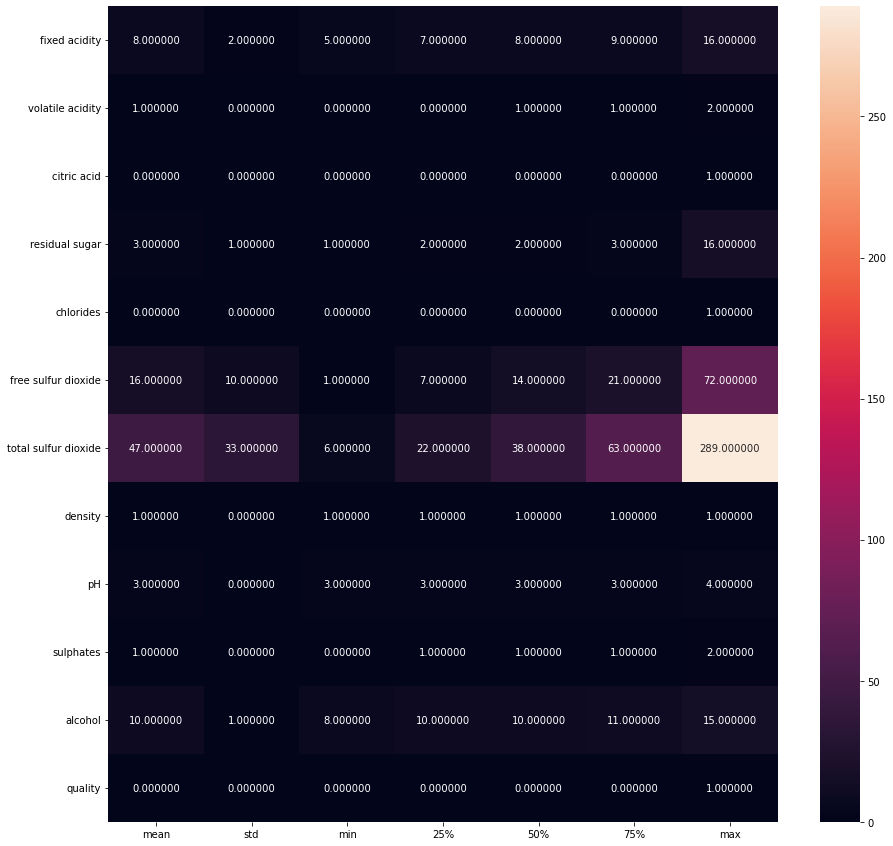

In [18]:
# visulizing with graph
plt.figure(figsize=(15,15))
sns.heatmap(round(df.describe()[1:].T),annot=True,fmt='f')

In [19]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 2.133662
dtype: float64

As we can have the acceptable range -0.5 to 0.5 these data are highly skewed
Except citric acid, density and pH all are skewed

### Data visualization

### Univeriant visulaization

0    1175
1     184
Name: quality, dtype: int64


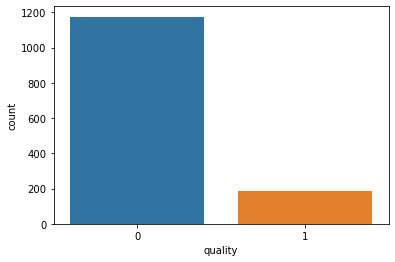

In [20]:
# Visulaize the number of quality
ax=sns.countplot(x='quality',data=df)
print(df['quality'].value_counts())

As found in static Analysis the data is imbalance as class 0 which is not good is 86 % of the data

We use value count as quality is categorical variable for other columns we will check distribution.
To check the distribution we are using distplot

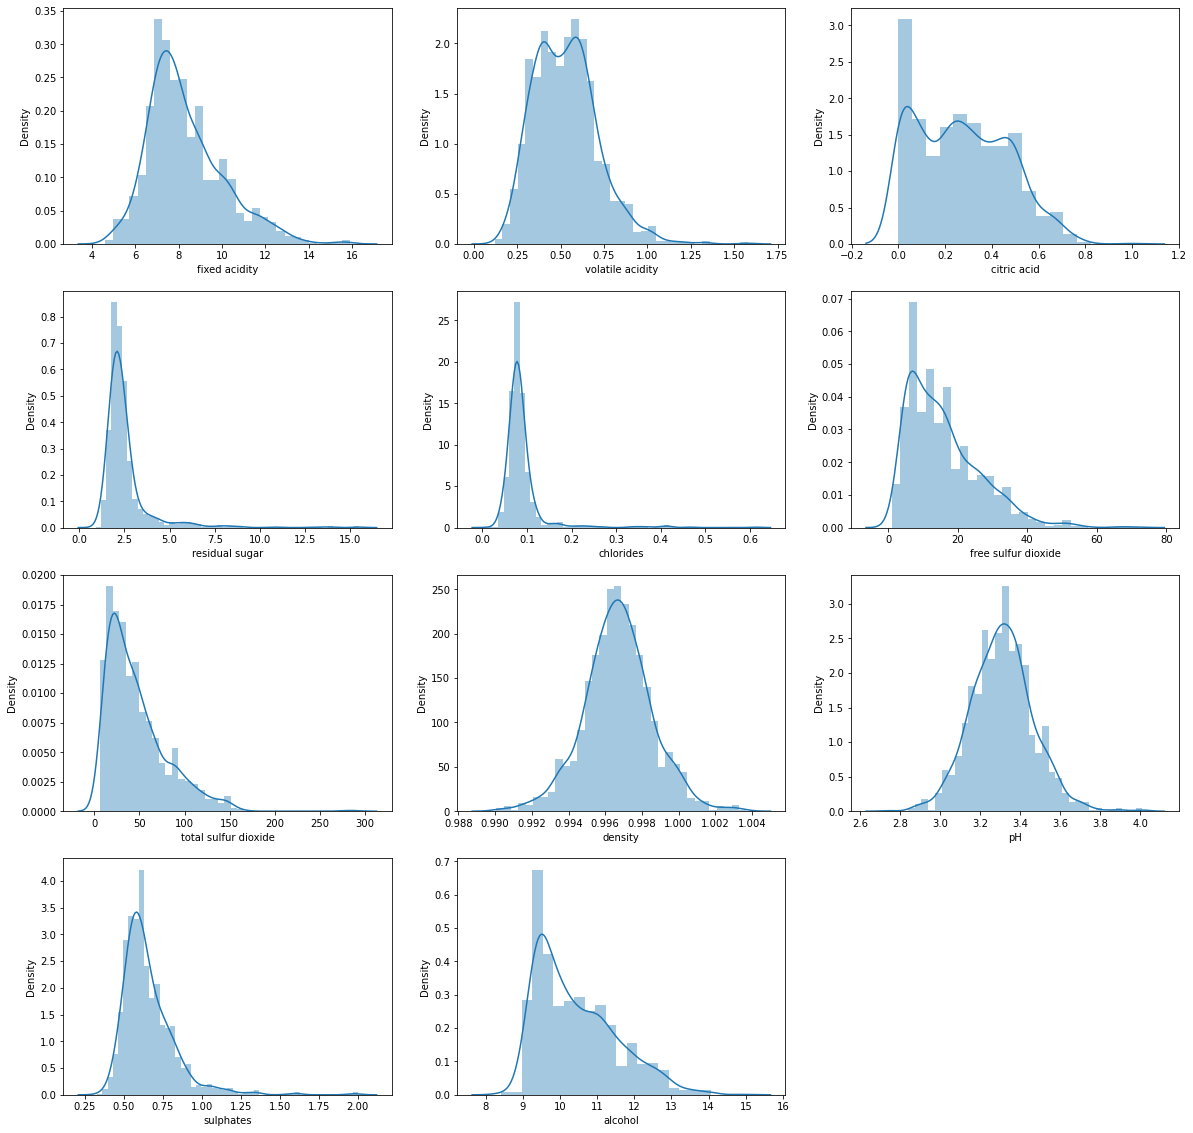

In [21]:
plt.figure(figsize=(20,20))
p=1
for i in df.columns[:-1]:
    if p<=11:
        ax=plt.subplot(4,3,p)
        sns.distplot(df[i])
    p+=1
plt.show()

From the above loop we can see that citric acid,density and pH are normally distributed only others are right skewed

#### Bivarient Analysis

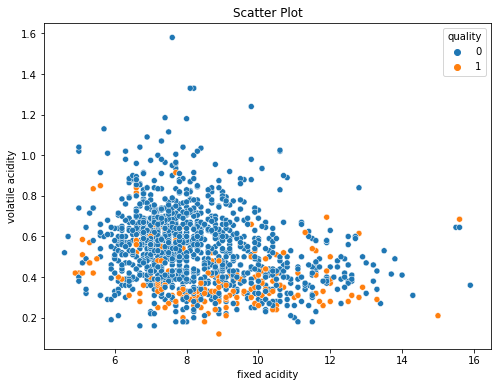

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='fixed acidity', y='volatile acidity', hue='quality')
plt.title('Scatter Plot')
plt.show()

we can see strong trend through the graph

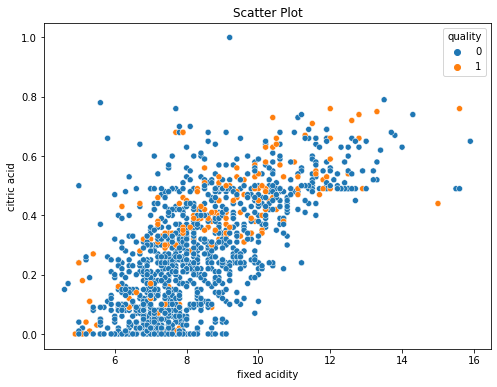

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='fixed acidity', y='citric acid', hue='quality')
plt.title('Scatter Plot')
plt.show()

We can see the increasing trend there might be existing correlation

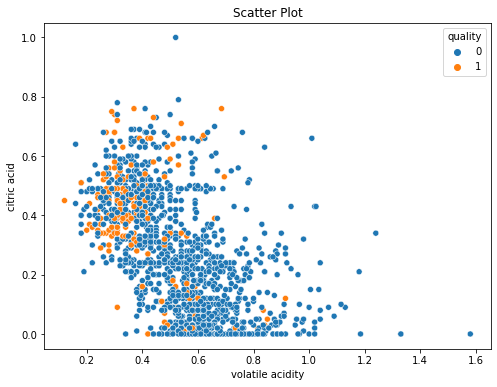

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='volatile acidity', y='citric acid', hue='quality')
plt.title('Scatter Plot')
plt.show()

There is decreasing trend collinerality is possible

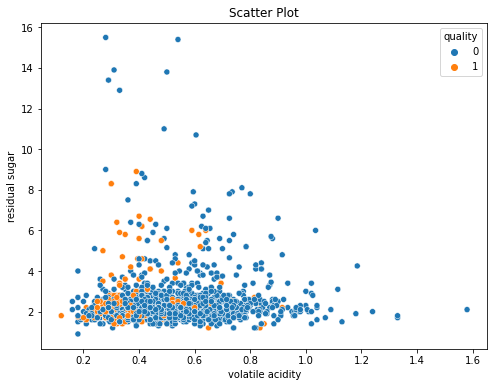

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='volatile acidity', y='residual sugar', hue='quality')
plt.title('Scatter Plot')
plt.show()

No trend found

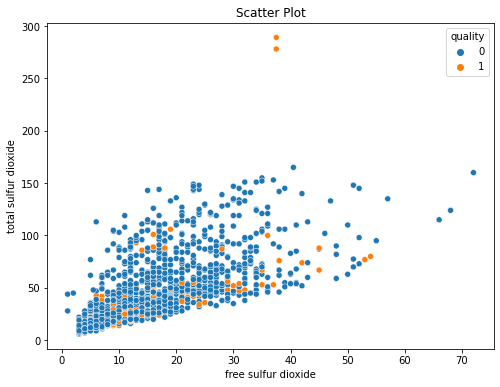

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='free sulfur dioxide', y='total sulfur dioxide', hue='quality')
plt.title('Scatter Plot')
plt.show()

There is increasing trend  between both sulfur dioxide

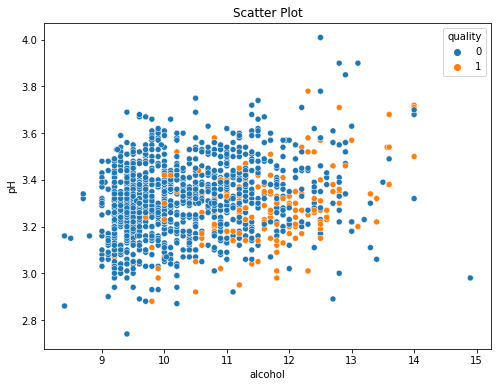

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='alcohol', y='pH', hue='quality')
plt.title('Scatter Plot')
plt.show()

No trend found

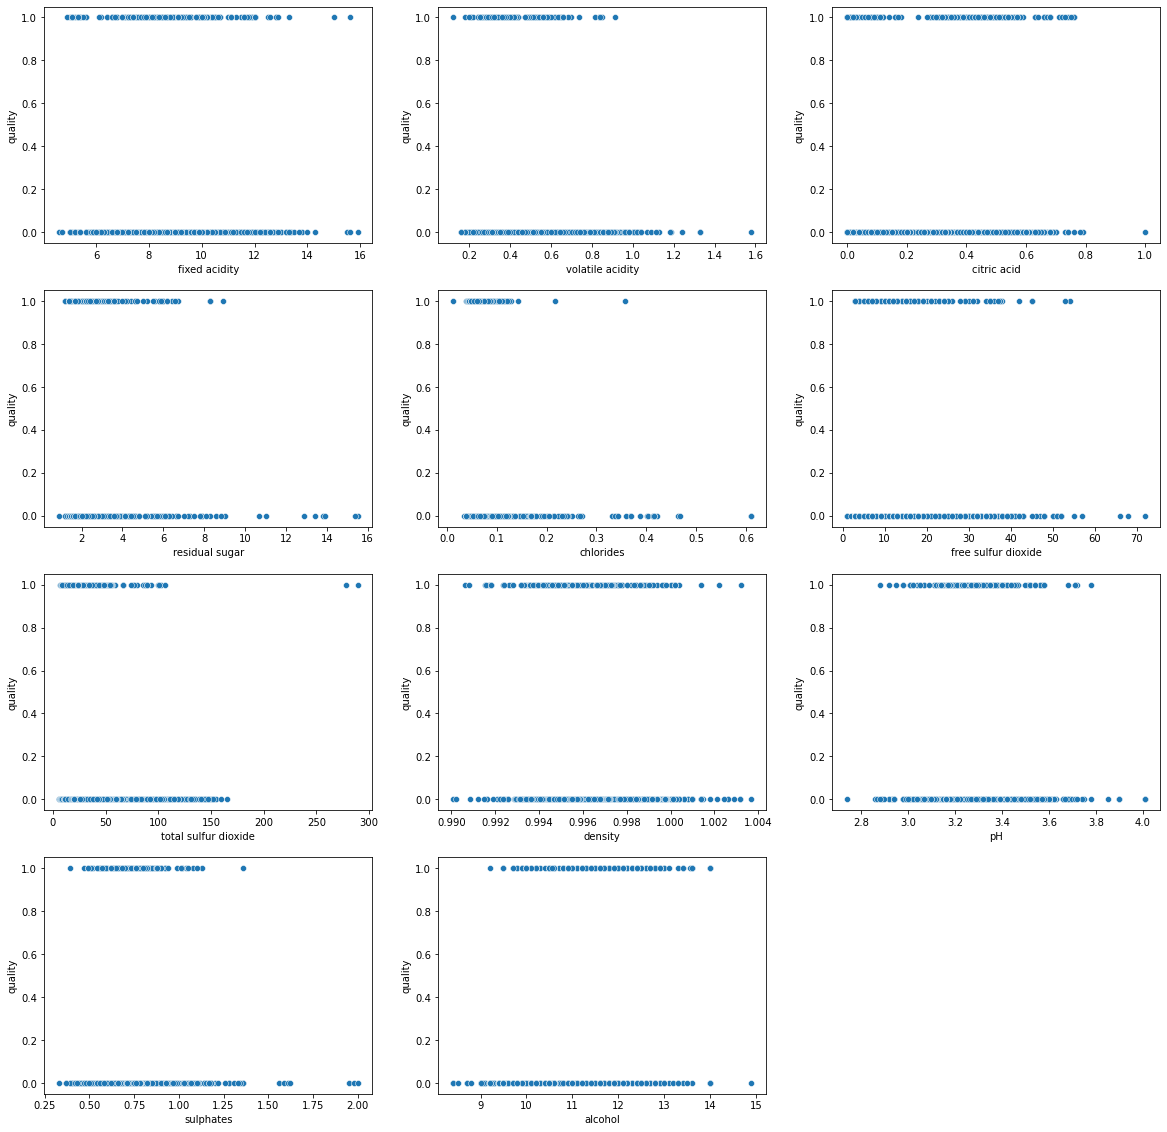

In [28]:
plt.figure(figsize=(20,20))
p=1
for i in df.columns[:-1]:
    if p<=11:
        ax=plt.subplot(4,3,p)
        sns.scatterplot(data=df,x=df[i],y='quality')
    p+=1
plt.show()

- We can see the fixed acidity is equally distributed in the range 0 to 13
- We can see the volatile acidity is equally distributed in the range 0.2 to 1
- We can see the citric acid is equally distributed in the range 0 to 0.7
- We can see the residual sugar is unequally distributed
- We can see the chlorides is unequally distributed
- We can see the free sulfur dioxide is equally distributed in the range 0 to 45 
- We can see the total sulfur dioxide is equally distributed in the range 0 to 150
- We can see the density is equally distributed in the range 0.9 to 1.004
- We can see the pH is equally distributed in the range 2.8 to 3.8
- We can see the sulphates is equally distributed in the range 0.3 to 1.3
- We can see the alcohol is equally distributed in the range 7 to 13

#### Multivariate Analysis

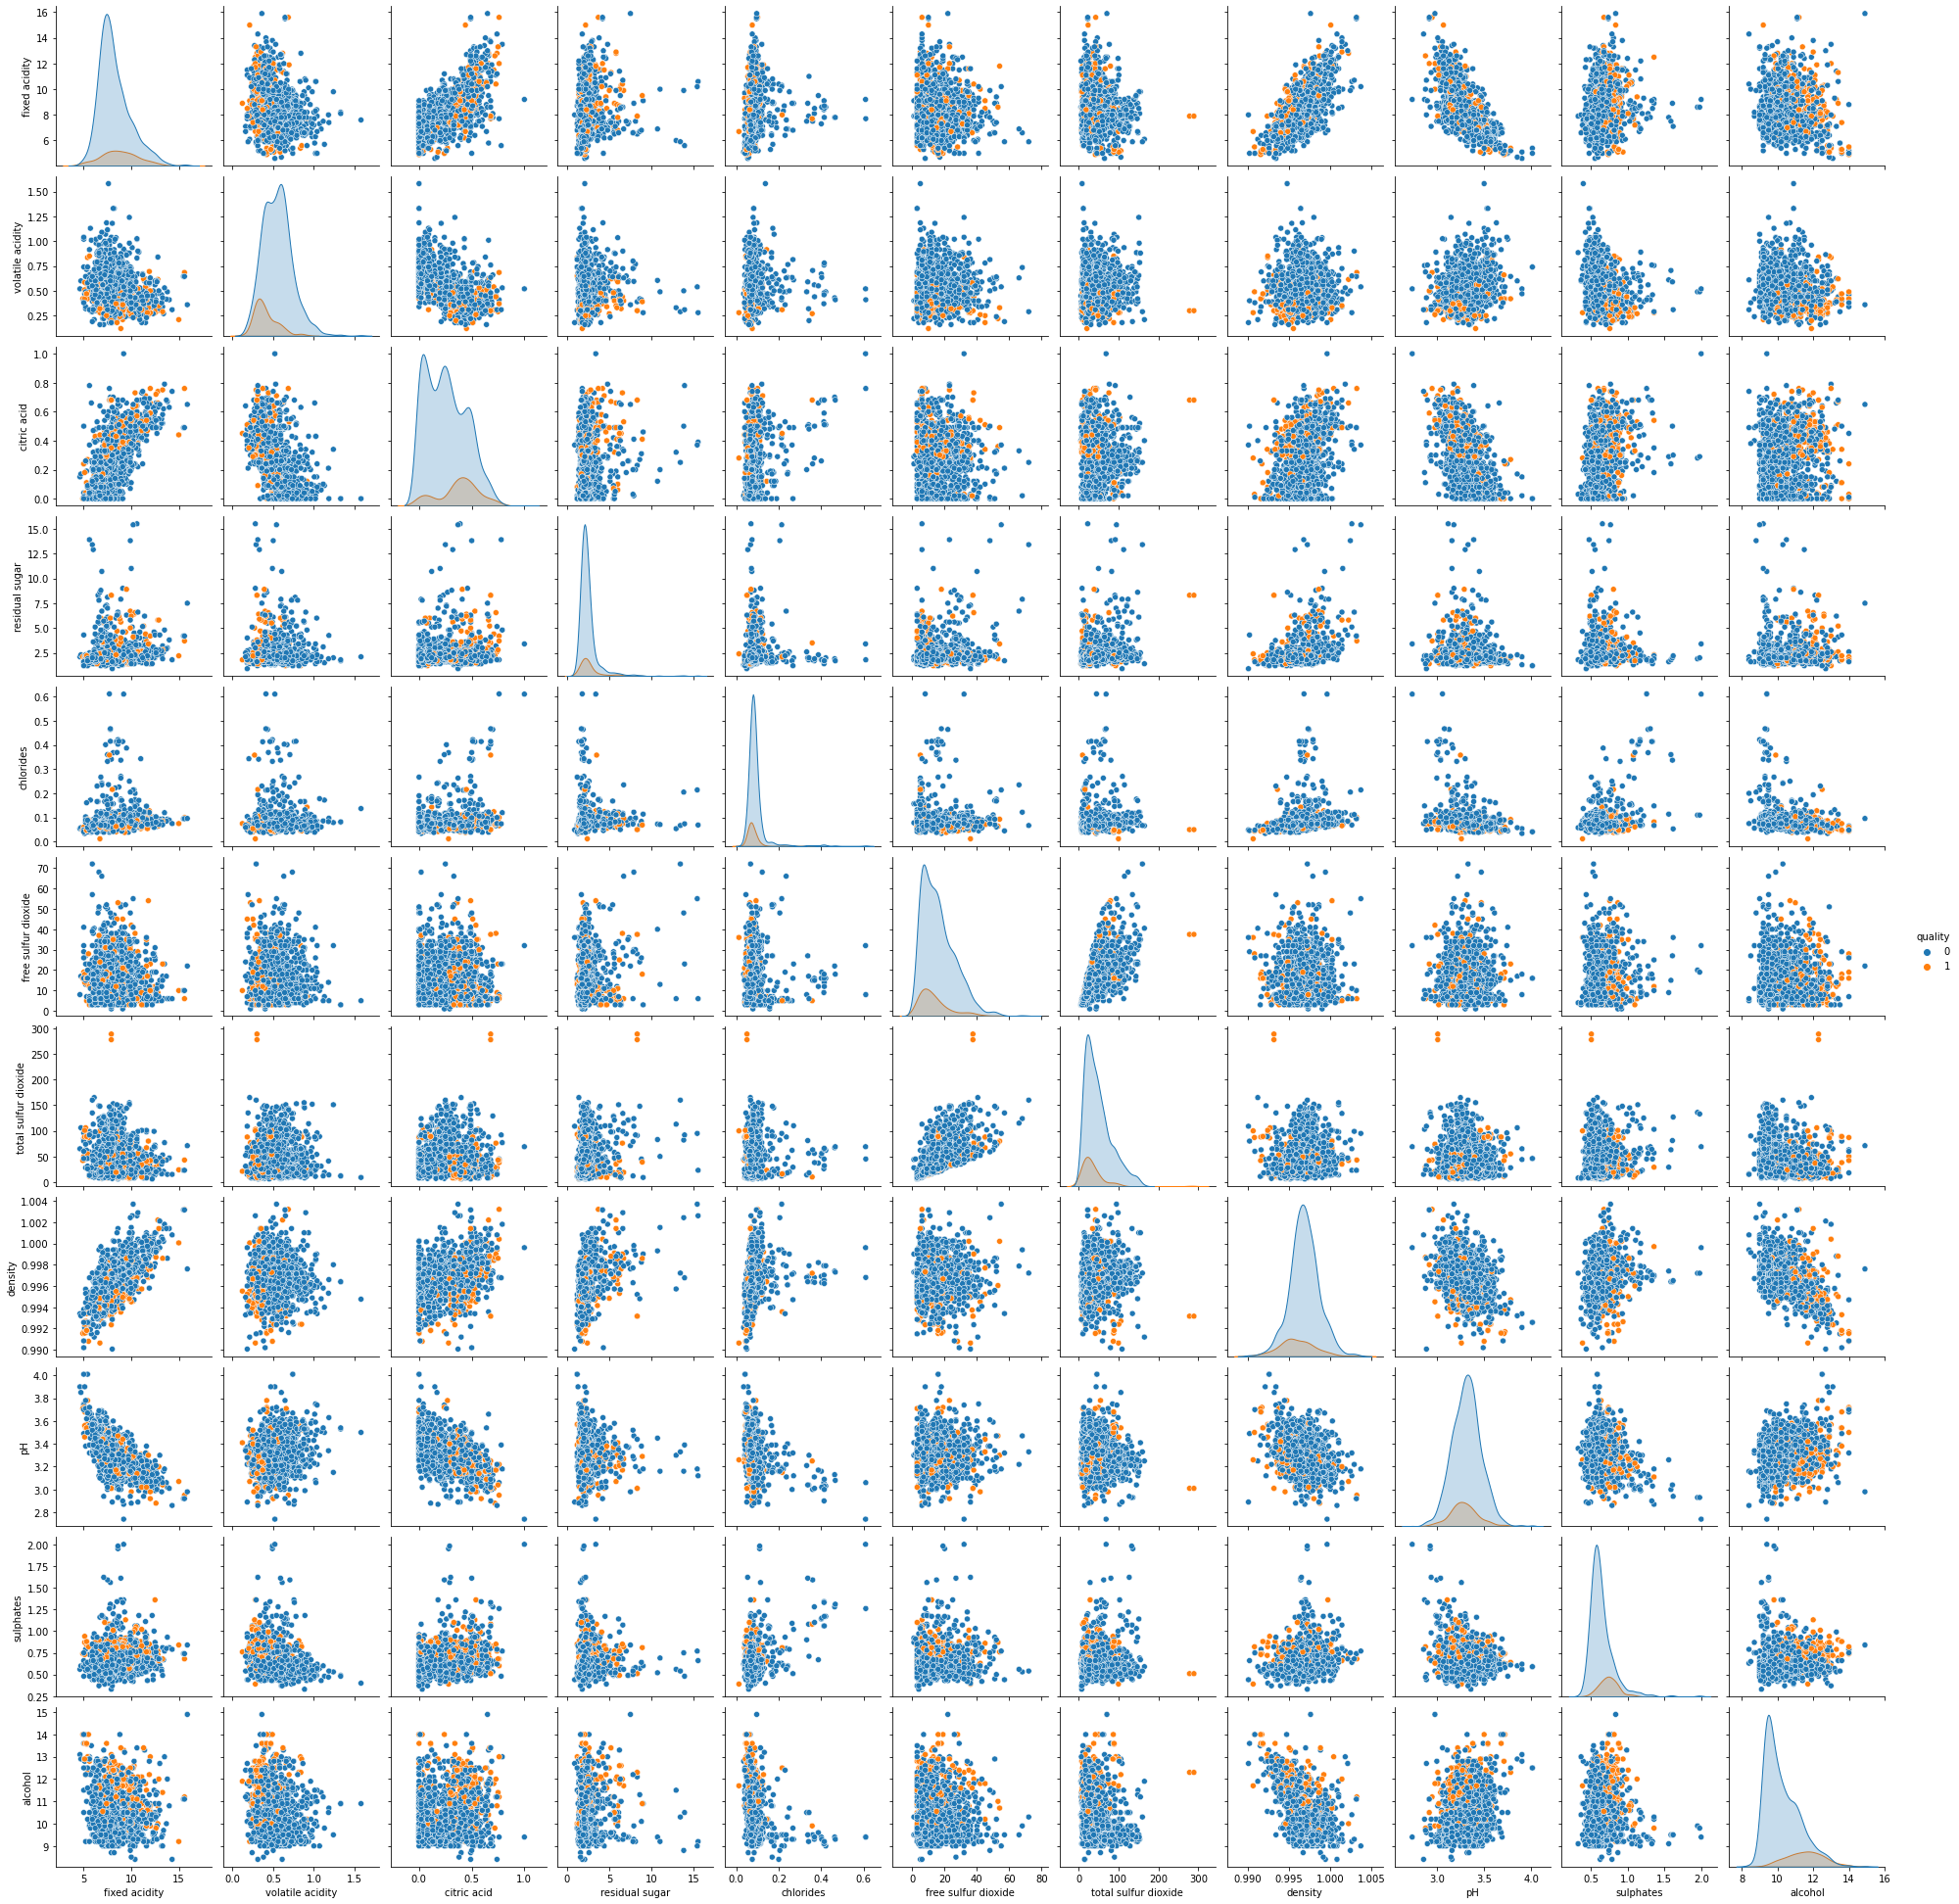

In [29]:
sns.pairplot(df,hue='quality')
plt.show()

1.The pairplot gives the pairwise relation between the features on the basis of the target "quality" .On the diagonal we can notice the distribution plots.

2.Strong linear relation between 
- fixed acidity vs citric acid
- fixed acidity vs pH
- fixed acidity vs density
- free sulfur dioxide vs free sulfur dioxide

3.There can be outliers we need to check using boxplot. 

### Checking the outliers

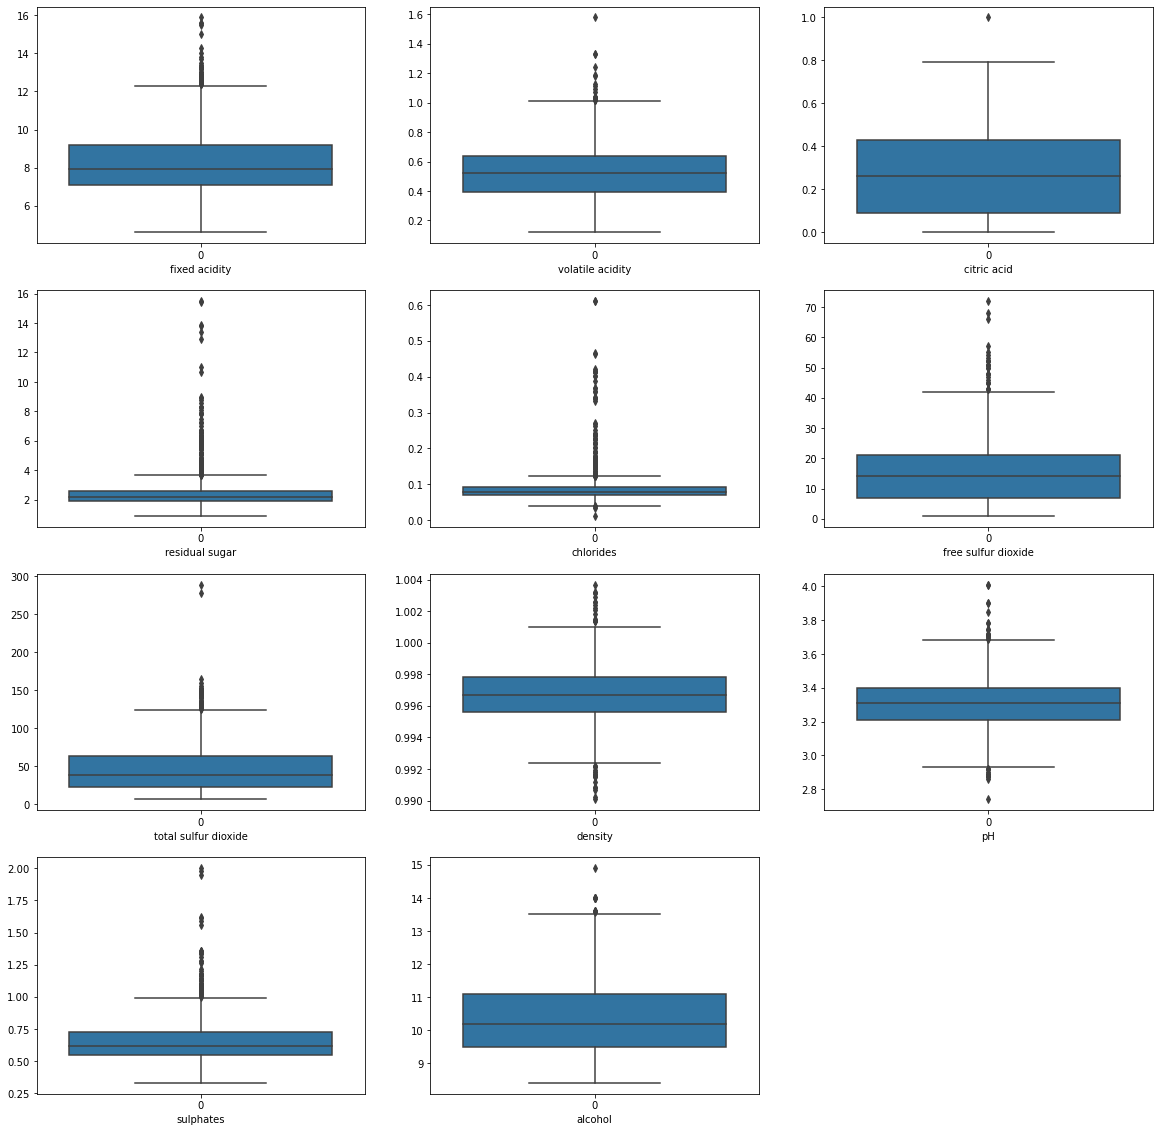

In [30]:
plt.figure(figsize=(20,20))
p=1
for i in df.columns[:-1]:
    if p<=11:
        ax=plt.subplot(4,3,p)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    p+=1
plt.show()

As we can see except citric acid  all the columns have so many outliers

Treating Skewness before removing outliers as transforming data might lead to reduce outliers and while treating outliers we loose less data.

### Treating skewness 

In [31]:
# spliting the dataset
x=df.drop('quality',axis=1)
y=df.quality

In [32]:
#transform the data to remove skewness 
from sklearn.preprocessing import power_transform
x=power_transform(x)

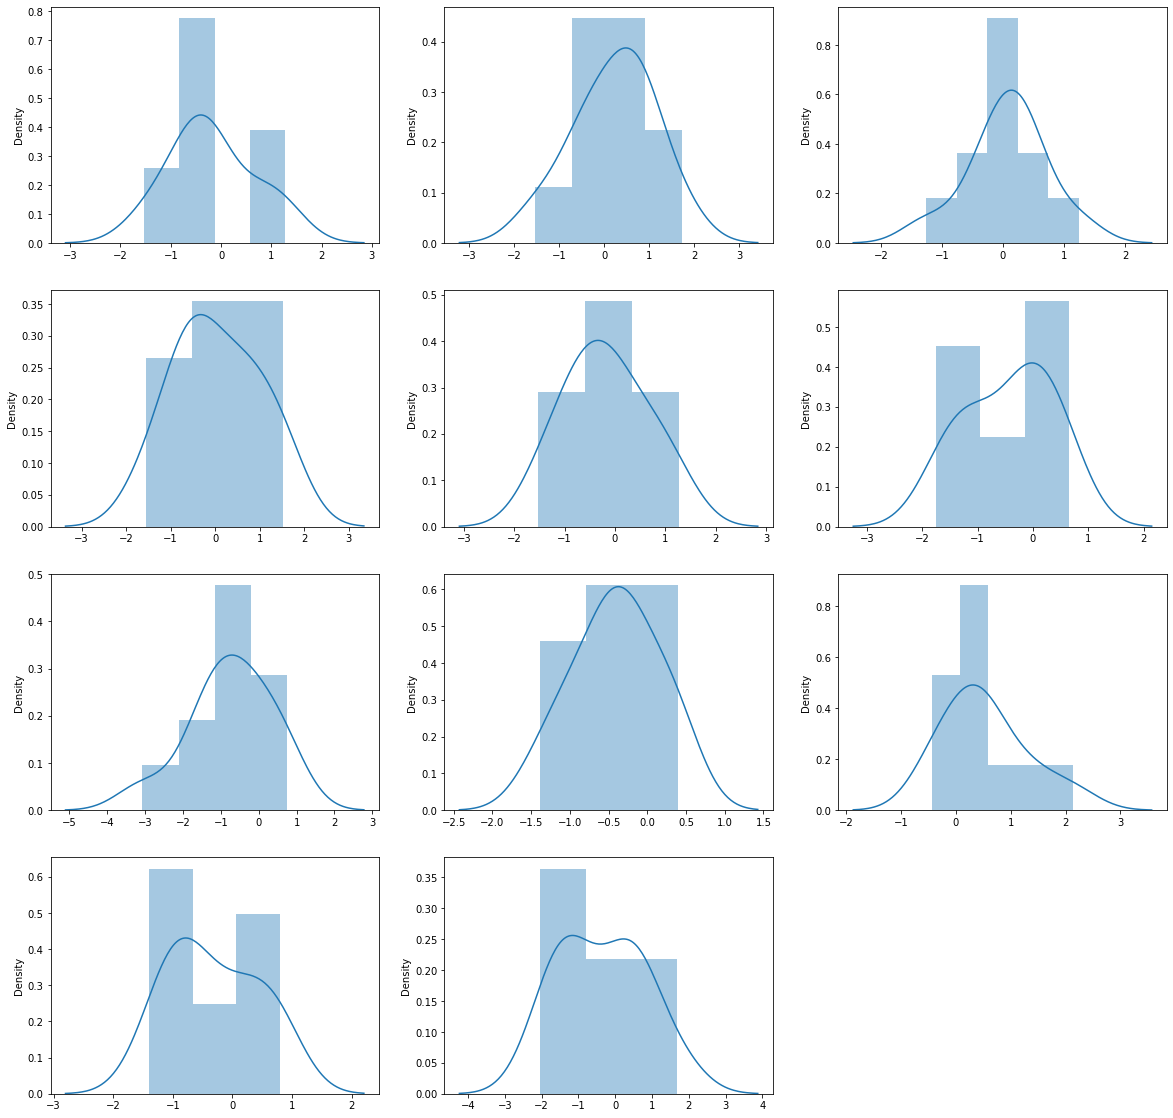

In [33]:
# again ploting the graph to checking the skewness 
plt.figure(figsize=(20,20))
p=1
for i in x:
    if p<=11:
        ax=plt.subplot(4,3,p)
        sns.distplot(i)
    p+=1
plt.show()

In [34]:
# converting the np.array to dataframe for further analysis
x=pd.DataFrame(x, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [35]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.439412          0.978091    -1.530544       -0.602600  -0.166676   
1         -0.161475          1.720040    -1.530544        0.560720   0.778512   
2         -0.161475          1.242047    -1.256962        0.153076   0.557116   
3          1.529010         -1.551503     1.389613       -0.602600  -0.219369   
4         -0.439412          0.791661    -1.530544       -0.844564  -0.219369   
...             ...               ...          ...             ...        ...   
1354      -0.903672          0.596149    -0.996743       -0.602600  -0.616834   
1355      -1.436385          0.494776    -0.996743       -0.384706   0.477791   
1356      -1.733557          0.230050    -0.871292       -0.009276  -1.001198   
1357      -1.733557          0.719444    -0.748774       -0.384706  -0.219369   
1358      -1.631976         -1.317784     1.021677        1.386960  -0.677948   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.269573             -0.128948  0.587781  1.277041   
1                0.992495              0.841796  0.054350 -0.695907   
2                0.192377              0.530012  0.161294 -0.296058   
3                0.384096              0.681966  0.694083 -0.967619   
4               -0.023152              0.100926  0.587781  1.277041   
...                   ...                   ...       ...       ...   
1354             1.176074              0.028175 -0.100946  0.727244   
1355             1.395040              0.236575 -0.968055  0.912498   
1356             1.724577              0.447853 -0.849072  1.337040   
1357             1.395040              0.236575 -0.660104  1.633860   
1358             0.472612              0.170291 -0.649318  0.539956   

      sulphates   alcohol  
0     -0.582775 -1.068157  
1      0.400130 -0.499290  
2      0.188379 -0.499290  
3     -0.391438 -0.499290  
4     -0.582775 -1.068157  
...         ...       ...  
1354   1.169880 -0.916248  
1355  -0.391438  0.286561  
1356   0.878488  0.875408  
1357   0.593171 -0.021928  
1358   0.261172  0.723544  

[1359 rows x 11 columns]

In [36]:
# skewness is in desired range
x.skew()

fixed acidity           0.001884
volatile acidity        0.008311
citric acid             0.016563
residual sugar         -0.001715
chlorides              -0.061923
free sulfur dioxide    -0.009899
total sulfur dioxide   -0.003897
density                -0.002812
pH                     -0.005007
sulphates               0.014637
alcohol                 0.116742
dtype: float64

Rechecking outliers

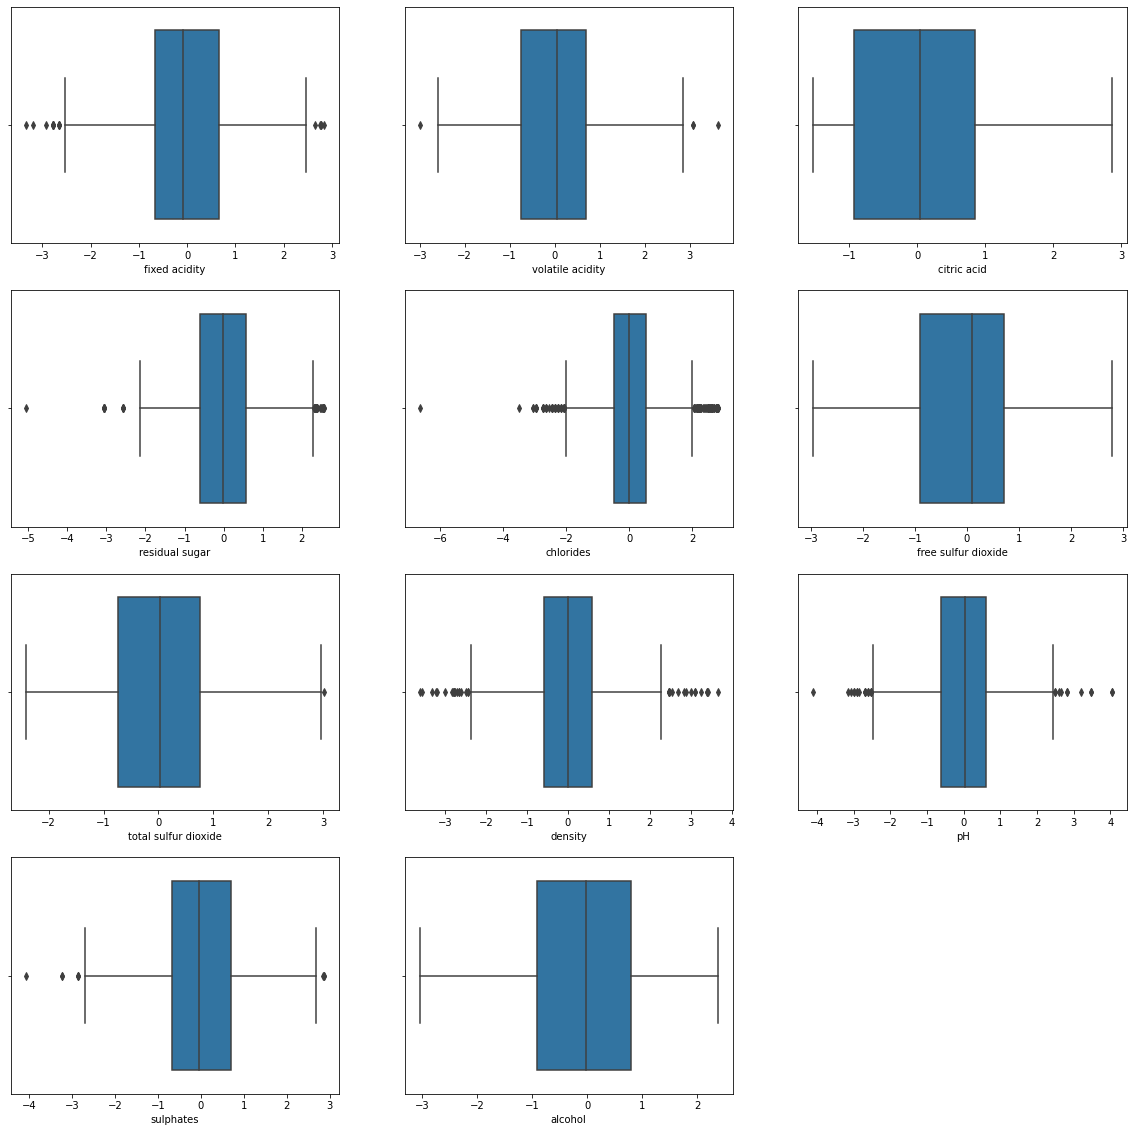

In [37]:
plt.figure(figsize=(20,20))
p=1
for i in x.columns:
    if p<=11:
        ax=plt.subplot(4,3,p)
        sns.boxplot(x[i])
        plt.xlabel(i)
    p+=1
plt.show()

from the above graphs we can see that outliers are Reduced and complete reduced to zero from these columns
- citric acid
- free sulfur dioxide
- alcohol

Z-Score Technique

In [38]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
z.shape

(1359, 11)

In [39]:
Threshold=3
print(np.where(z>3))

(array([   6,   41,   41,   87,   87,  114,  115,  135,  151,  175,  385,
        410,  420,  450,  473,  473,  483,  485,  528,  534,  602,  602,
        689,  722,  722,  764,  779,  810,  866,  866,  920,  948, 1081,
       1082, 1097, 1106, 1121, 1121, 1125, 1125, 1161, 1165, 1216, 1250,
       1333], dtype=int64), array([ 3,  0,  8,  0,  8,  1,  1,  8,  9,  3,  7,  3,  7, 10,  8, 10,  7,
        7,  7,  8,  4,  8,  4,  4,  7,  7,  3,  1,  3,  7,  6,  7,  7,  7,
        9,  1,  3,  8,  3,  8,  9,  3,  7,  7,  4], dtype=int64))


In [40]:
Threshold = 3
outlier_indices = np.where(z > 3)[0]

In [41]:
# df1=x[(z<3).all(axis=1)]
# print(x.shape)


df1 = x.loc[~np.isin(np.arange(len(x)), outlier_indices)]
print(x.shape)
print(df1.shape)

(1359, 11)
(1322, 11)


In [42]:
y = y.loc[~np.isin(np.arange(len(y)), outlier_indices)]
print(y.shape)


(1322,)


In [43]:
x=df1

np.arange(len(y)) will give thr index from 0 to len(y)-1 and np.isin will check the condition is true or not ~ it will flipt the result.

In [44]:
print("Percentage loss of dataloss ",((x.shape[0]-df1.shape[0])/x.shape[0])*100)

Percentage loss of dataloss  0.0


merging the dataset to find correlation

In [45]:
# Reset the indices of both DataFrames
x.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Merge x and y DataFrames based on their indices
df = pd.concat([x, y], axis=1)

# Verify the shape of the merged DataFrame
print(df.shape)


(1322, 12)


In [46]:
# checking the correlationbetween features and the target.
cor=df.corr()
cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.276836     0.648379   
volatile acidity          -0.276836          1.000000    -0.588790   
citric acid                0.648379         -0.588790     1.000000   
residual sugar             0.189557          0.051766     0.145766   
chlorides                  0.221517          0.140528     0.130393   
free sulfur dioxide       -0.156590          0.028919    -0.069933   
total sulfur dioxide      -0.096084          0.106436     0.021756   
density                    0.663007          0.028771     0.340689   
pH                        -0.706182          0.241044    -0.545932   
sulphates                  0.201446         -0.323565     0.331614   
alcohol                   -0.060181         -0.222565     0.105590   
quality                    0.108530         -0.289223     0.202137   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.189557   0.221517            -0.156590   
volatile acidity            0.051766   0.140528             0.028919   
citric acid                 0.145766   0.130393            -0.069933   
residual sugar              1.000000   0.155540             0.082785   
chlorides                   0.155540   1.000000             0.005429   
free sulfur dioxide         0.082785   0.005429             1.000000   
total sulfur dioxide        0.143124   0.115447             0.782351   
density                     0.389219   0.385604            -0.021356   
pH                         -0.051345  -0.258135             0.090478   
sulphates                   0.007727   0.114396             0.035440   
alcohol                     0.137058  -0.309937            -0.106781   
quality                     0.067363  -0.154726            -0.096243   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.096084  0.663007 -0.706182   0.201446   
volatile acidity                  0.106436  0.028771  0.241044  -0.323565   
citric acid                       0.021756  0.340689 -0.545932   0.331614   
residual sugar                    0.143124  0.389219 -0.051345   0.007727   
chlorides                         0.115447  0.385604 -0.258135   0.114396   
free sulfur dioxide               0.782351 -0.021356  0.090478   0.035440   
total sulfur dioxide              1.000000  0.131507 -0.033225   0.003296   
density                           0.131507  1.000000 -0.325786   0.145807   
pH                               -0.033225 -0.325786  1.000000  -0.124916   
sulphates                         0.003296  0.145807 -0.124916   1.000000   
alcohol                          -0.293033 -0.458649  0.186198   0.194073   
quality                          -0.186686 -0.156385 -0.055950   0.273573   

                       alcohol   quality  
fixed acidity        -0.060181  0.108530  
volatile acidity     -0.222565 -0.289223  
citric acid           0.105590  0.202137  
residual sugar        0.137058  0.067363  
chlorides            -0.309937 -0.154726  
free sulfur dioxide  -0.106781 -0.096243  
total sulfur dioxide -0.293033 -0.186686  
density              -0.458649 -0.156385  
pH                    0.186198 -0.055950  
sulphates             0.194073  0.273573  
alcohol               1.000000  0.395954  
quality               0.395954  1.000000

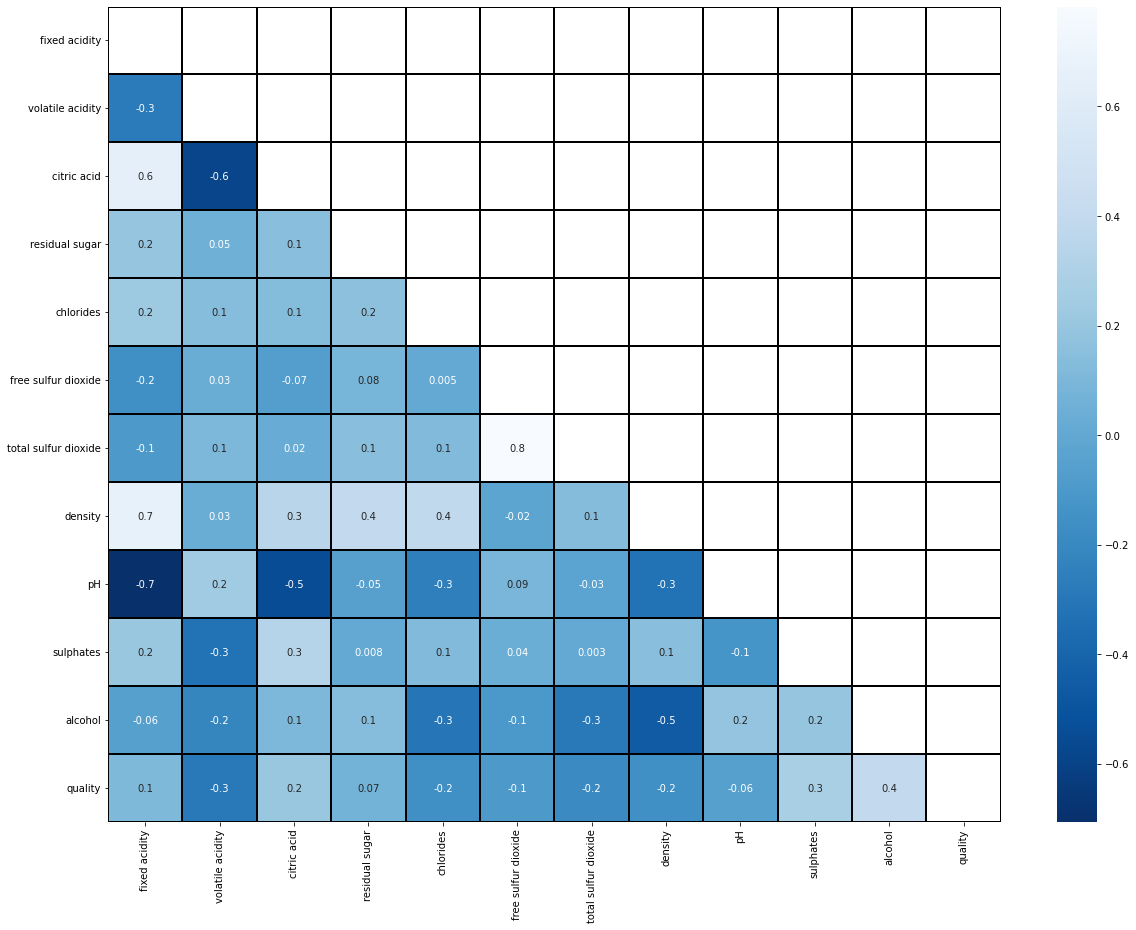

In [47]:
# Visualizing the correlation matrix by plotting heatmap
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), mask=mask, cmap='Blues_r', annot=True, fmt=".1g", linewidths=0.1, ax=ax,linecolor="black")
plt.yticks(rotation=0);
plt.show()

In [48]:
cor['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.395954
sulphates               0.273573
citric acid             0.202137
fixed acidity           0.108530
residual sugar          0.067363
pH                     -0.055950
free sulfur dioxide    -0.096243
chlorides              -0.154726
density                -0.156385
total sulfur dioxide   -0.186686
volatile acidity       -0.289223
Name: quality, dtype: float64

We can observe the positive and negative correlated features with the target.

In [49]:
df1=df.drop('fixed acidity',axis=1)

In [50]:
cor1=df.corr()
cor1

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.276836     0.648379   
volatile acidity          -0.276836          1.000000    -0.588790   
citric acid                0.648379         -0.588790     1.000000   
residual sugar             0.189557          0.051766     0.145766   
chlorides                  0.221517          0.140528     0.130393   
free sulfur dioxide       -0.156590          0.028919    -0.069933   
total sulfur dioxide      -0.096084          0.106436     0.021756   
density                    0.663007          0.028771     0.340689   
pH                        -0.706182          0.241044    -0.545932   
sulphates                  0.201446         -0.323565     0.331614   
alcohol                   -0.060181         -0.222565     0.105590   
quality                    0.108530         -0.289223     0.202137   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.189557   0.221517            -0.156590   
volatile acidity            0.051766   0.140528             0.028919   
citric acid                 0.145766   0.130393            -0.069933   
residual sugar              1.000000   0.155540             0.082785   
chlorides                   0.155540   1.000000             0.005429   
free sulfur dioxide         0.082785   0.005429             1.000000   
total sulfur dioxide        0.143124   0.115447             0.782351   
density                     0.389219   0.385604            -0.021356   
pH                         -0.051345  -0.258135             0.090478   
sulphates                   0.007727   0.114396             0.035440   
alcohol                     0.137058  -0.309937            -0.106781   
quality                     0.067363  -0.154726            -0.096243   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.096084  0.663007 -0.706182   0.201446   
volatile acidity                  0.106436  0.028771  0.241044  -0.323565   
citric acid                       0.021756  0.340689 -0.545932   0.331614   
residual sugar                    0.143124  0.389219 -0.051345   0.007727   
chlorides                         0.115447  0.385604 -0.258135   0.114396   
free sulfur dioxide               0.782351 -0.021356  0.090478   0.035440   
total sulfur dioxide              1.000000  0.131507 -0.033225   0.003296   
density                           0.131507  1.000000 -0.325786   0.145807   
pH                               -0.033225 -0.325786  1.000000  -0.124916   
sulphates                         0.003296  0.145807 -0.124916   1.000000   
alcohol                          -0.293033 -0.458649  0.186198   0.194073   
quality                          -0.186686 -0.156385 -0.055950   0.273573   

                       alcohol   quality  
fixed acidity        -0.060181  0.108530  
volatile acidity     -0.222565 -0.289223  
citric acid           0.105590  0.202137  
residual sugar        0.137058  0.067363  
chlorides            -0.309937 -0.154726  
free sulfur dioxide  -0.106781 -0.096243  
total sulfur dioxide -0.293033 -0.186686  
density              -0.458649 -0.156385  
pH                    0.186198 -0.055950  
sulphates             0.194073  0.273573  
alcohol               1.000000  0.395954  
quality               0.395954  1.000000

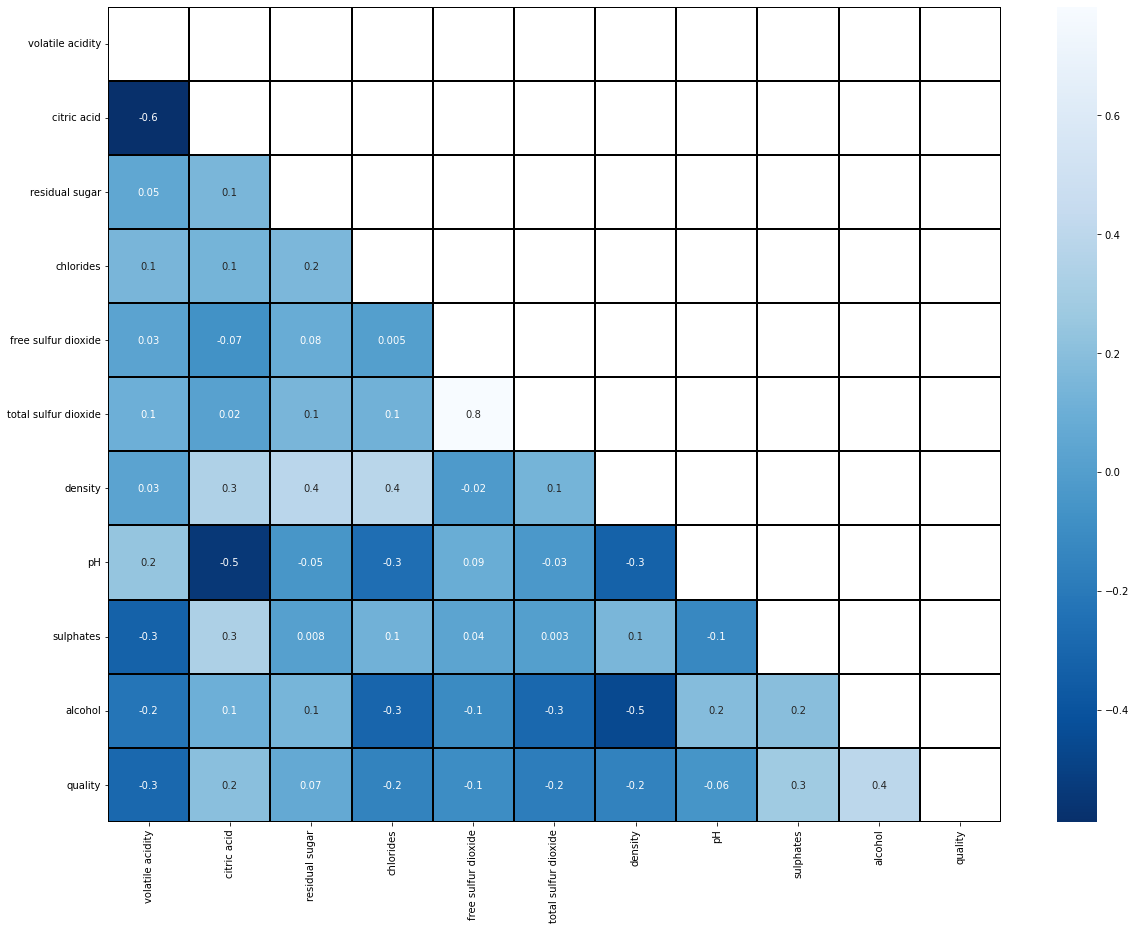

In [51]:
# Visualizing the correlation matrix by plotting heatmap
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df1.corr(), mask=mask, cmap='Blues_r', annot=True, fmt=".1g", linewidths=0.1, ax=ax,linecolor="black")
plt.yticks(rotation=0);
plt.show()

In [52]:
cor1['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.395954
sulphates               0.273573
citric acid             0.202137
fixed acidity           0.108530
residual sugar          0.067363
pH                     -0.055950
free sulfur dioxide    -0.096243
chlorides              -0.154726
density                -0.156385
total sulfur dioxide   -0.186686
volatile acidity       -0.289223
Name: quality, dtype: float64

### PCA

In [53]:
x=df1.drop('quality',axis=1)
y=df1.quality

X is areality scaled in powertrasform.

In [54]:
x.shape

(1322, 10)

In [55]:
y.shape

(1322,)

In [56]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x)

array([[ 1.69265931, -1.18152883, -1.16085436, ...,  0.11454092,
        -0.2032281 ,  0.26071052],
       [ 0.35815544, -2.23966626, -0.27529445, ..., -0.80176691,
        -0.18915185, -0.0169854 ],
       [ 0.483775  , -1.45877642, -0.61708292, ..., -0.47685545,
         0.01238491,  0.26039859],
       ...,
       [ 1.51050898, -0.42834479,  2.25125038, ..., -0.08519874,
        -0.42732419, -0.40255956],
       [ 1.51044364, -0.94209801,  1.19978879, ...,  0.28930208,
        -0.21150999, -0.7086056 ],
       [-0.53561917,  0.8895444 ,  1.68683015, ..., -0.22432795,
         0.52662323, -0.52142007]])

### Scree plot

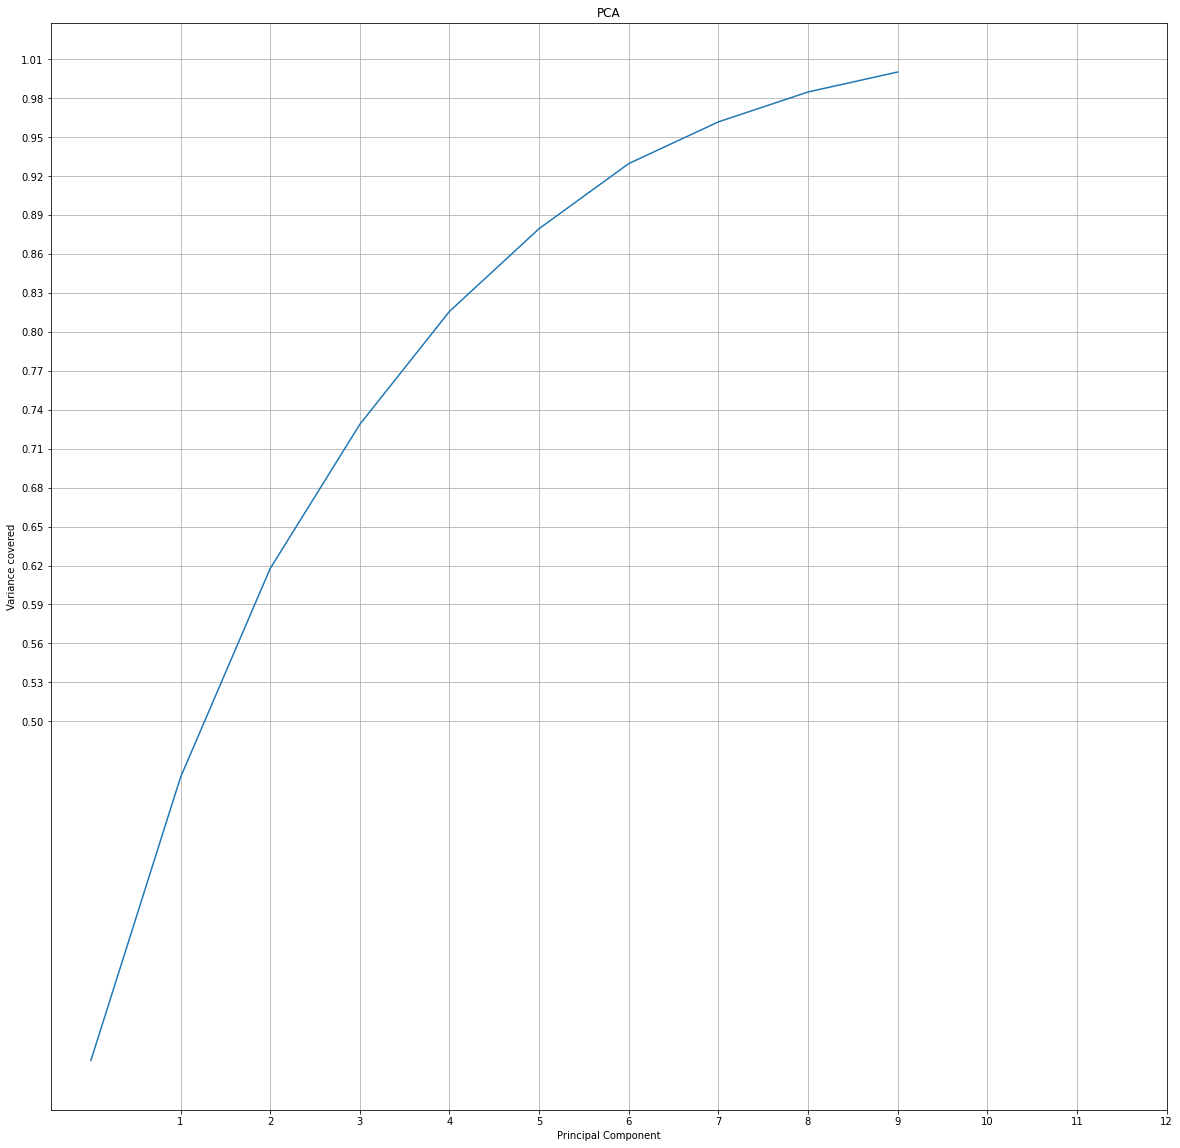

In [57]:
plt.figure(figsize=(20,20))
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # np.cumsum is for cumulative of all.
plt.xlabel('Principal Component')
plt.grid('both')
plt.yticks(np.arange(0.5,1.03,0.03))
plt.xticks(range(1,13,1))
plt.ylabel('Variance covered')
plt.title("PCA")
plt.show()


As from thr graph we can see 9 component can cover more than 99.5% of the data.

In [58]:
pca=PCA(n_components=9)
new_pcom=pca.fit_transform(x)

In [59]:
princi_comp=pd.DataFrame(new_pcom,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
princi_comp

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     1.692659 -1.181529 -1.160854 -0.273561 -0.460088 -1.093053  0.217414   
1     0.358155 -2.239666 -0.275294  0.484617 -0.845761  0.824279 -1.123363   
2     0.483775 -1.458776 -0.617083  0.185920 -0.687745  0.370999 -0.691043   
3    -1.802192  0.126055  0.648686 -1.328776  1.112968 -0.327931  0.390659   
4     1.655989 -1.302776 -0.846578 -0.534094 -0.455407 -1.118691  0.281785   
...        ...       ...       ...       ...       ...       ...       ...   
1317  0.872092 -0.973023  0.658805 -0.551301 -1.295399 -1.020645 -0.587527   
1318  1.516058 -1.026534  0.880228 -0.041428 -0.511041  0.745782  0.567792   
1319  1.510509 -0.428345  2.251250  0.556235 -0.822564 -0.393878 -0.283674   
1320  1.510444 -0.942098  1.199789  0.121670 -1.160506 -0.376491  0.182182   
1321 -0.535619  0.889544  1.686830  1.060032  0.746909 -0.314268  0.637192   

           PC8       PC9  
0     0.114541 -0.203228  
1    -0.801767 -0.189152  
2    -0.476855  0.012385  
3     0.251142 -0.198889  
4     0.141345 -0.300849  
...        ...       ...  
1317 -0.378443 -0.332824  
1318 -0.062996 -0.495772  
1319 -0.085199 -0.427324  
1320  0.289302 -0.211510  
1321 -0.224328  0.526623  

[1322 rows x 9 columns]

### oversampling

In [60]:
y.value_counts()

0    1146
1     176
Name: quality, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE
SM= SMOTE()
princi_comp,y=SM.fit_resample(princi_comp,y)

In [62]:
y.value_counts()

0    1146
1    1146
Name: quality, dtype: int64

In [63]:
princi_comp.shape

(2292, 9)

In [64]:
x=princi_comp

balancing the imbalance dataset.

### Modeling

#### Find the best random state

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_states = range(1, 200)
accuracy_scores = []

for rs in random_states:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=rs)
    clf = RandomForestClassifier()
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    acc = accuracy_score(y_test, pred)
    accuracy_scores.append(acc)

max_accu = max(accuracy_scores)
max_rs = random_states[accuracy_scores.index(max_accu)]

print("Best accuracy is", max_accu, "at random_state", max_rs)


Best accuracy is 0.9534883720930233 at random_state 185


### Creating train test split

In [96]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=rs)

Splitting the dataset

### Classification Algorithms

In [97]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

#### Metrics

In [98]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [99]:
training_score = []
testing_score = []

#### Defining the matric function

In [100]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

In the above function we are checking the models precision,recall,f1-score and confusion_matrix matrix and storing the accuracy in list

#### Logistic Regression

Accuracy_Score of LogisticRegression() model on Training Data is: 81.60847880299252
Accuracy_Score of LogisticRegression() model on Testing Data is: 85.90116279069767

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.8539944903581267
Recall Score of LogisticRegression() model is: 0.8757062146892656
F1 Score of LogisticRegression() model is: 0.8647140864714087

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


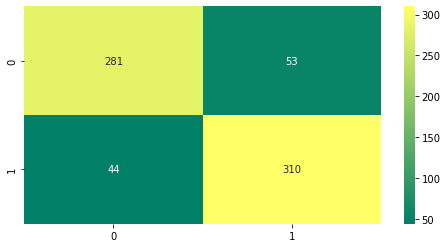

In [101]:
model_prediction(LogisticRegression())

Calling the function and giving model Accuracy_Score of model is 85.90


#### model_prediction(LogisticRegression())

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 90.33665835411472
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 88.22674418604652

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.8167053364269141
Recall Score of KNeighborsClassifier() model is: 0.9943502824858758
F1 Score of KNeighborsClassifier() model is: 0.8968152866242037

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


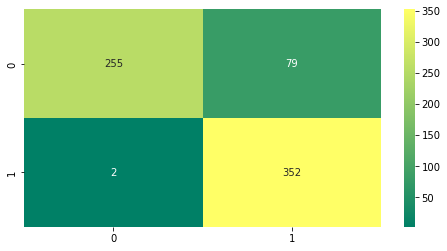

In [102]:
model_prediction(KNeighborsClassifier())

Calling the function and giving model Accuracy_Score of model is 88.23


#### Support-Vector-Classifier Model

Accuracy_Score of SVC() model on Training Data is: 89.46384039900249
Accuracy_Score of SVC() model on Testing Data is: 87.5

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.8544973544973545
Recall Score of SVC() model is: 0.9124293785310734
F1 Score of SVC() model is: 0.8825136612021859

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


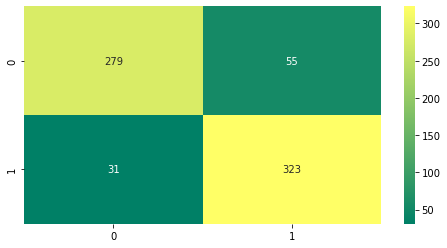

In [103]:
model_prediction(SVC())

Calling the function and giving model Accuracy_Score of model is 87.50


#### Decision-Tree-Classifier Model

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 89.53488372093024

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.8916666666666667
Recall Score of DecisionTreeClassifier() model is: 0.9067796610169492
F1 Score of DecisionTreeClassifier() model is: 0.8991596638655461

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


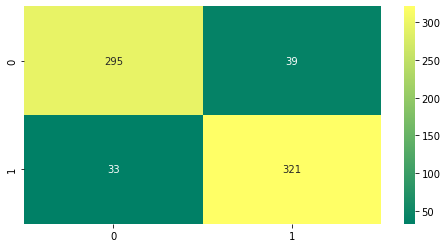

In [104]:
model_prediction(DecisionTreeClassifier())

Calling the function and giving model Accuracy_Score of model is 89.53


#### Random-Forest-Classifier Model

Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 94.04069767441861

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.921832884097035
Recall Score of RandomForestClassifier() model is: 0.9661016949152542
F1 Score of RandomForestClassifier() model is: 0.9434482758620689

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


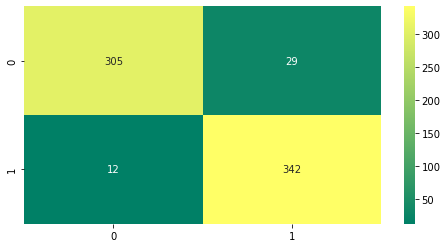

In [105]:
model_prediction(RandomForestClassifier())

Calling the function and giving model Accuracy_Score of model is 94.04


#### ExtraTreesClassifier

Accuracy_Score of ExtraTreesClassifier() model on Training Data is: 100.0
Accuracy_Score of ExtraTreesClassifier() model on Testing Data is: 95.49418604651163

------------------------------------------------------------------------
Precision Score of ExtraTreesClassifier() model is: 0.9306666666666666
Recall Score of ExtraTreesClassifier() model is: 0.9858757062146892
F1 Score of ExtraTreesClassifier() model is: 0.9574759945130316

------------------------------------------------------------------------
Confusion Matrix of ExtraTreesClassifier() model is:


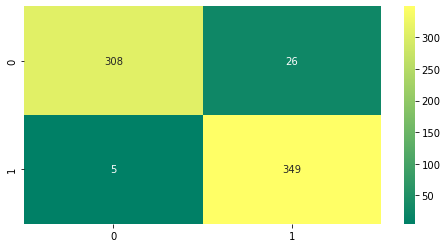

In [106]:
model_prediction(ExtraTreesClassifier())

Calling the function and giving model Accuracy_Score of model is 95.5


#### Ada-Boost-Classifier Model

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 89.15211970074813
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 87.5

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.8722222222222222
Recall Score of AdaBoostClassifier() model is: 0.8870056497175142
F1 Score of AdaBoostClassifier() model is: 0.8795518207282913

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


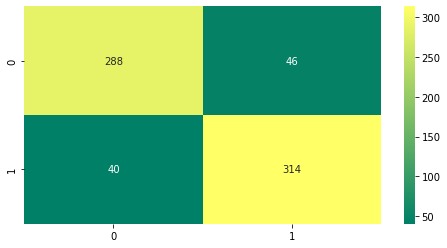

In [107]:
model_prediction(AdaBoostClassifier())

Calling the function and giving model Accuracy_Score of model is 87.5


#### Gradient-Boosting-Classifier Model

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 94.0149625935162
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 89.97093023255815

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.8759894459102903
Recall Score of GradientBoostingClassifier() model is: 0.9378531073446328
F1 Score of GradientBoostingClassifier() model is: 0.9058663028649386

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


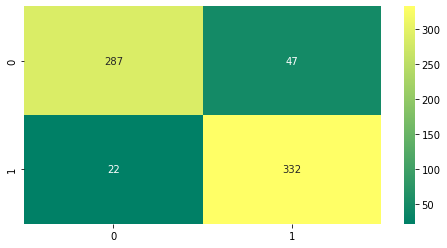

In [108]:
model_prediction(GradientBoostingClassifier())

Calling the function and giving model Accuracy_Score of model is 89.97


#### XGBClassifier Model

Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_round

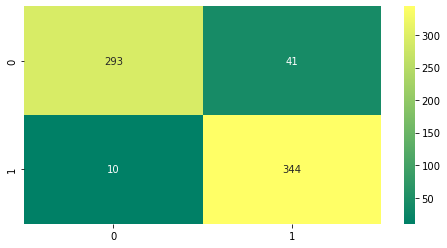

In [109]:
model_prediction(XGBClassifier())

Calling the function and giving model Accuracy_Score of model is 92.58


### All Model Performance Comparison

In [110]:
models = ["Logistic Regression","KNN","SVM","Decision Tree","Random Forest","Extra Tree","Ada Boost",
          "Gradient Boost","XGBoost"]

In [111]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [112]:
df

Algorithms  Training Score  Testing Score
0  Logistic Regression       81.608479      85.901163
1                  KNN       90.336658      88.226744
2                  SVM       89.463840      87.500000
3        Decision Tree      100.000000      89.534884
4        Random Forest      100.000000      94.040698
5           Extra Tree      100.000000      95.494186
6            Ada Boost       89.152120      87.500000
7       Gradient Boost       94.014963      89.970930
8              XGBoost      100.000000      92.587209

Making a data frame from the list to check the performence of diffrent models

### Plotting above results using column-bar chart

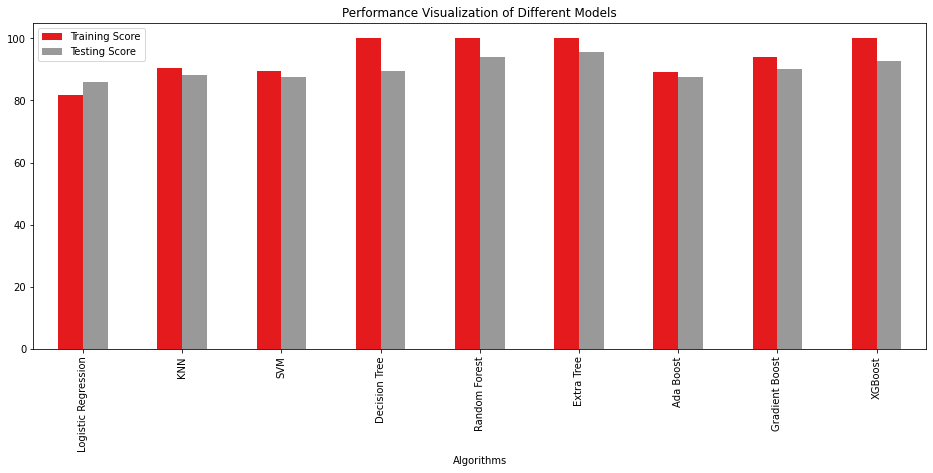

In [113]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

###  Cross Validation score

In [114]:
from sklearn.model_selection import cross_val_score

classification algorithms- default scoring parameter - accuracy

cv=5--- it's a fold value 1,2,3,4,5 (5 is default)

In [115]:
# checking cv score for logistic Regression
score = cross_val_score(LogisticRegression(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[0]/100)- score.mean())

[0.88671024 0.79302832 0.87336245 0.71834061 0.81004367]
0.8162970573964665
Differnet between Accuracy score and cross validation score is-  0.0427145705105102


In [116]:
# checking cv score for KNeighborsClassifier
score = cross_val_score(KNeighborsClassifier(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[1]/100)- score.mean())

[0.92592593 0.82135076 0.8930131  0.79475983 0.8231441 ]
0.851638743804169
Differnet between Accuracy score and cross validation score is-  0.03062869805629609


In [117]:
# checking cv score for SVC
score = cross_val_score(SVC(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[2]/100)- score.mean())

[0.92374728 0.80392157 0.91048035 0.79039301 0.83842795]
0.8533940310719144
Differnet between Accuracy score and cross validation score is-  0.02160596892808564


In [118]:
# checking cv score for DecisionTreeClassifier
score = cross_val_score(DecisionTreeClassifier(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[3]/100)- score.mean())

[0.88671024 0.85185185 0.90393013 0.84279476 0.87554585]
0.8721665667722693
Differnet between Accuracy score and cross validation score is-  0.023182270437033026


In [119]:
# checking cv score for RandomForestClassifier
score = cross_val_score(RandomForestClassifier(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[4]/100)- score.mean())

[0.94335512 0.88235294 0.95414847 0.86462882 0.91484716]
0.91186650303013
Differnet between Accuracy score and cross validation score is-  0.028540473714056103


In [120]:
# checking cv score for ExtraTreesClassifier
score = cross_val_score(ExtraTreesClassifier(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[5]/100)- score.mean())

[0.97385621 0.89760349 0.96069869 0.88427948 0.93449782]
0.9301871355043716
Differnet between Accuracy score and cross validation score is-  0.024754724960744712


In [121]:
# checking cv score for AdaBoostClassifier
score = cross_val_score(AdaBoostClassifier(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[6]/100)- score.mean())

[0.87363834 0.82352941 0.89956332 0.75545852 0.85152838]
0.8407435948663794
Differnet between Accuracy score and cross validation score is-  0.034256405133620604


In [122]:
# checking cv score for GradientBoostingClassifier
score = cross_val_score(GradientBoostingClassifier(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[7]/100)- score.mean())

[0.91938998 0.8583878  0.91921397 0.81659389 0.86026201]
0.8747695293546821
Differnet between Accuracy score and cross validation score is-  0.024939772970899332


In [123]:
# checking cv score for XGBClassifier
score = cross_val_score(XGBClassifier(),x,y)
print(score)
print(score.mean())
print("Differnet between Accuracy score and cross validation score is- ", (testing_score[8]/100)- score.mean())

[0.94989107 0.88235294 0.93668122 0.87336245 0.90393013]
0.9092435615682468
Differnet between Accuracy score and cross validation score is-  0.016628531455008977


XGBClassifier is our best model as different between accuracy score and cross validation score is least. Still we are going to do hyperparameter tuning for ExtraTreesClassifier and RandomForest as well because its performance is best and difference is not too high compare to XGBClassifier.

### Hyper parameter Tuning

In [124]:
from sklearn.model_selection import GridSearchCV

#### XGBClassifier

In [139]:
model1 = XGBClassifier()

In [147]:
parameters1 = {"n_estimators":[50,100,150],
              "learning_rate":[0.01,0.1,0.3],
              'max_features':['auto', 'sqrt', 'log2'],
              'criterion':['friedman_mse', 'squared_error']}

In [148]:
grid_search1 = GridSearchCV(model1, parameters1 , cv=5, n_jobs=-1)

In [149]:
grid_search1.fit(x_train,y_train)

[14:15:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "max_features" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]})

In [150]:
grid_search1.best_score_

0.9170794392523364

In [151]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'criterion': 'friedman_mse',
 'learning_rate': 0.3,
 'max_features': 'auto',
 'n_estimators': 100}

##### Creating XGBoost Model Using Best Parameters

In [152]:
model1 = XGBClassifier(**best_parameters1)

In [153]:
model1.fit(x_train,y_train)

[14:15:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "max_features" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='friedman_mse',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_features='auto',
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [154]:
x_test_pred1 = model1.predict(x_test)

In [155]:
accuracy_score(y_test,x_test_pred1)

0.9258720930232558

After hyper parameter tuning the accuracy remain almost same.

#### ExtraTreesClassifier

In [205]:
model2 =ExtraTreesClassifier()

In [215]:
parameters2={'n_estimators':[80,100,120],
            'criterion':['gini', 'entropy'],
            'max_features':['None', 'sqrt', 'log2'],
            'max_depth':[0,2,3]}

In [216]:
grid_search2 = GridSearchCV(model2, parameters2 , cv=5, n_jobs=-1)

In [217]:
grid_search2.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=ExtraTreesClassifier(max_depth=8, max_features='log2',
                                            n_estimators=120),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 2, 3],
                         'max_features': ['None', 'sqrt', 'log2'],
                         'n_estimators': [80, 100, 120]})

In [218]:
grid_search2.best_score_

0.8223208722741433

In [219]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'n_estimators': 80}

#### Creating ExtraTreesClassifier Model Using Best Parameters

In [220]:
model2 =ExtraTreesClassifier(**best_parameters2)

In [221]:
model2.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=3, max_features='log2', n_estimators=80)

In [222]:
x_test_pred2 = model2.predict(x_test)

In [223]:
accuracy_score(y_test,x_test_pred2)

0.8488372093023255

In [204]:
m=ExtraTreesClassifier()
m.fit(x_train,y_train)
predict=m.predict(x_test)
accuracy_score(y_test,predict)

0.9593023255813954

As the hyper parameter tuning score is going down so will stick with default parameter for this model.

### RandomForestClassifier

In [166]:
model3 = RandomForestClassifier()

In [167]:
parameters3 = {'n_estimators': [100,300,500,550],
                'min_samples_split':[7,8,9],
                'max_depth': [10,11,12], 
                'min_samples_leaf':[4,5,6]}

In [168]:
grid_search3 = GridSearchCV(model3, parameters3, cv=5, n_jobs=-1)

In [169]:
grid_search3.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 550]})

In [170]:
grid_search3.best_score_

0.8890303738317756

In [171]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'max_depth': 11,
 'min_samples_leaf': 4,
 'min_samples_split': 9,
 'n_estimators': 300}

##### Creating Random Forest Model Using Best Parameters

In [172]:
model3 = RandomForestClassifier(**best_parameters3)

In [173]:
model3.fit(x_train,y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=4, min_samples_split=9,
                       n_estimators=300)

In [174]:
x_test_pred3 = model3.predict(x_test)

In [175]:
accuracy_score(y_test,x_test_pred3)

0.9186046511627907

In [225]:
m2=RandomForestClassifier()
m2.fit(x_train,y_train)
predict=m.predict(x_test)
accuracy_score(y_test,predict)

0.9593023255813954

As the hyper parameter tuning score is going down so will stick with default parameter for this model

### Plotting the roc_curve

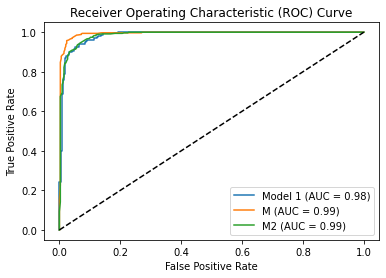

AUC Score for Model 1: 0.9244984607057072
AUC Score for M: 0.9584221387733007
AUC Score for M2: 0.9363899320004059


In [227]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

# Calculate and plot ROC curve for model1
y_pred_prob1 = model1.predict_proba(x_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
roc_auc1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, label='Model 1 (AUC = %0.2f)' % roc_auc1)

# Calculate and plot ROC curve for model2
y_pred_prob2 = m.predict_proba(x_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
roc_auc2 = auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label='M (AUC = %0.2f)' % roc_auc2)

# Calculate and plot ROC curve for model3
y_pred_prob3 = m2.predict_proba(x_test)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
roc_auc3 = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label='M2 (AUC = %0.2f)' % roc_auc3)

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC scores
auc_score1 = roc_auc_score(y_test, model1.predict(x_test))
print('AUC Score for Model 1:', auc_score1)

auc_score2 = roc_auc_score(y_test, m.predict(x_test))
print('AUC Score for M:', auc_score2)

auc_score3 = roc_auc_score(y_test, m2.predict(x_test))
print('AUC Score for M2:', auc_score3)



here we have plotted the ROC curve for the  M(ExtraTreeClassifier)without hyper parameter tunning and the AUC value for the best model is 95.84%

### Saving the model

In [228]:
# Saving the model using .pkl
import joblib
joblib.dump(m,"WineQuality.pkl")


['WineQuality.pkl']

### Predicting the saved model

In [229]:
# Let's load the saved model and get the predictions
model=joblib.load("WineQuality.pkl")

In [230]:
# Prediction
prediction=model.predict(x_test)
prediction

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,

These are the predicted wine quality values of the wine

In [231]:
a=np.array(y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

Predicted  Original
0            1         0
1            1         1
2            1         1
3            0         0
4            0         0
..         ...       ...
683          0         0
684          1         1
685          1         1
686          1         1
687          0         0

[688 rows x 2 columns]

**ExtraTreesClassifier is the model in this case**

### Thankyou for checking this model